In [4]:
# Importing libraries
import pandas as pd
from pathlib import Path
import csv
from config import api_key
import requests
from pprint import pprint
import random

import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import time
import seaborn as sns

import plotly.express as px
from dash import Dash, dcc, html, Input, Output

In [44]:
csv_path = Path("../Resources/global air pollution dataset.csv")
global_df = pd.read_csv(csv_path)
global_df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [45]:
global_df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [46]:
NorthAmerica_df = global_df.loc[global_df['Country'].isin(['United States of America', 'Canada', 'Mexico'])]
NorthAmerica_df.head()
NorthAmerica_df.count()

Country               3601
City                  3601
AQI Value             3601
AQI Category          3601
CO AQI Value          3601
CO AQI Category       3601
Ozone AQI Value       3601
Ozone AQI Category    3601
NO2 AQI Value         3601
NO2 AQI Category      3601
PM2.5 AQI Value       3601
PM2.5 AQI Category    3601
dtype: int64

In [47]:
unique_cities = NorthAmerica_df[['Country', 'City']].drop_duplicates().reset_index(drop=True)
cities_list = unique_cities['City']
cities_list.to_csv('../Resources/cities_list.csv')
unique_cities.to_csv('../Resources/citiesandcountry_list.csv')

# Making a list of cities. This is the entire list of 3601 countries 
list_cities = cities_list.to_list()

# Randomized list of 500 cities. This is probably better for plotting and to avoid hitting API limit
random_cities = random.sample(list_cities,500) # change to 500 or any number you want

# Shortened list of cities. Use this for testing code to avoid hitting API limit
short_cities = cities_list.head(3).tolist()


In [48]:
# Acessing the open weather API to get lattitude and longitude values

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Making API calls
lat = []
lon = []

# loop through list of cities
for city in random_cities:
    
    #print (city)
    
    response = requests.get(query_url + city).json()
    try:
        #print (response)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
    except Exception as e:
        print(f'city not found or {e}')
        pass

city not found or 'coord'
city not found or 'coord'
city not found or 'coord'
city not found or 'coord'
city not found or 'coord'
city not found or 'coord'
city not found or 'coord'
city not found or 'coord'
city not found or 'coord'
city not found or 'coord'
city not found or 'coord'


In [49]:

#List of Popular USA Cities
city_to_check = ["Los Angeles", "New York", "Chicago", "Houston", "Phoenix"]

#Adding 5 popular USA Cities to the DataFrame
if city_to_check not in random_cities:
    response = requests.get(query_url + city).json()
    try:
        #print (response)
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
    except Exception as e:
        print(f'city not found or {e}')
        pass

In [50]:
# Accessing the open weather API to get air pollution values

air_url = 'http://api.openweathermap.org/data/2.5/air_pollution?' # current air pollution values

coord = [] # latitude and longitude coordinates
aqi = [] # air quality index
co = [] # Concentration of CO (Carbon monoxide), μg/m3
nh3 = [] # Concentration of NO (Nitrogen monoxide), μg/m3
no = [] # Сoncentration of NO2 (Nitrogen dioxide), μg/m3
no2 = [] # Сoncentration of O3 (Ozone), μg/m3
o3 = [] # Сoncentration of SO2 (Sulphur dioxide), μg/m3
pm10 = [] # Сoncentration of PM2.5 (Fine particles matter),
pm2_5 = [] # Сoncentration of PM10 (Coarse particulate matter), μg/m3
so2 = [] # Сoncentration of NH3 (Ammonia), μg/m3


for lt,ln in zip(lat,lon):
    response = requests.get(f'{air_url}lat={lt}&lon={ln}&appid={api_key}').json()
    #pprint (response)
    try:
        coord.append(response['coord'])
        aqi.append(response['list'][0]['main']['aqi'])
        co.append(response['list'][0]['components']['co'])
        nh3.append(response['list'][0]['components']['nh3'])
        no.append(response['list'][0]['components']['no'])
        no2.append(response['list'][0]['components']['no2'])
        o3.append(response['list'][0]['components']['o3'])
        pm10.append(response['list'][0]['components']['pm10'])
        pm2_5.append(response['list'][0]['components']['pm2_5'])
        so2.append(response['list'][0]['components']['so2'])
    except Exception as e:
        print (f'failed to get values for lat:{lt} and lon:{ln}. Error is: {e}')

In [51]:
response

{'coord': {'lon': -2.7333, 'lat': 53.45},
 'list': [{'main': {'aqi': 1},
   'components': {'co': 216.96,
    'no': 0,
    'no2': 12.85,
    'o3': 38.98,
    'so2': 2.68,
    'pm2_5': 1.85,
    'pm10': 3.04,
    'nh3': 0.87},
   'dt': 1729206826}]}

In [52]:
# Create a DataFrame
map_data = pd.DataFrame({
    'Lat': lat,
    'Lon': lon,
    'AQI': aqi,
    'CO': co,
    'NH3': nh3,
    'NO2': no2,
    'O3': o3,
    'PM10': pm10,
    'PM2.5': pm2_5,
    'SO2': so2})

# Save the DataFrame to a CSV file
map_data.to_csv('../Resources/map_data.csv', index=False)

map_data.head()


,Lat,Lon,AQI,CO,NH3,NO2,O3,PM10,PM2.5,SO2
0,33.8817,-118.1170,3,317.10,1.19,26.39,117.30,18.04,13.05,12.64
1,33.2443,-86.8164,2,290.39,1.05,17.99,72.96,6.11,4.26,9.06
2,19.5167,-98.8833,2,507.36,3.14,24.68,80.82,11.04,9.08,16.93
3,26.9298,-82.0454,2,220.30,0.54,1.71,98.71,8.69,3.36,0.54
4,41.3614,-81.8129,1,347.14,1.19,27.08,43.99,6.76,5.34,2.12


In [7]:
#Dependencies for opencage
from opencage.
from config import api_key_opencage



SyntaxError: invalid syntax (385395009.py, line 2)

In [52]:
# Your OpenCage API key
geocoder = OpenCageGeocode(api_key_opencage)

def get_city(lat, lon):
    try:
        result = geocoder.reverse_geocode(lat, lon)
        if result and len(result):
            return result[0]['components'].get('city', '') or result[0]['components'].get('town', '') or result[0]['components'].get('village', 'Unknown')
        else:
            return "Unknown"
    except Exception as e:
        print(f"Error: {e}")
        return "Unknown"

# Apply the function to each row in the DataFrame
map_data['City'] = map_data.apply(lambda row: get_city(row['Lat'], row['Lon']), axis=1)

In [33]:
map_data = map_data[["City", "Lat", "Lon", "AQI", "CO", "NH3", "NO2", "O3", "PM10", "PM2.5", "SO2"]]
map_data.head()

,City,Lat,Lon,AQI,CO,NH3,NO2,O3,PM10,PM2.5,SO2
0,Vidor,30.1316,-94.0155,2,226.97,0.39,2.64,82.97,2.06,1.69,1.59
1,Shaker Heights,41.4739,-81.5371,2,213.62,0.32,3.17,88.69,0.79,0.52,1.64
2,Charlottetown,46.2352,-63.1267,2,210.29,0.04,0.68,87.26,0.65,0.50,1.07
3,East Hertfordshire,51.8126,-0.0283,1,240.33,0.24,17.48,22.53,3.04,2.83,3.58
4,Bixby,35.9420,-95.8833,1,360.49,2.47,27.76,46.49,5.48,4.65,1.31


In [53]:
#Searching for 5 most popular cities
print(map_data[map_data['City'].isin(city_to_check)])

         Lat       Lon  AQI      CO   NH3    NO2      O3   PM10  PM2.5   SO2  \
16   34.1578 -118.6384    3  247.00  0.06   5.66  111.58  13.31  10.21  1.52   
254  29.7633  -95.3633    1  283.72  1.16  20.22   55.79   3.85   2.45  5.72   

            City  
16   Los Angeles  
254      Houston  


In [76]:
app = Dash(__name__)

In [77]:
# App layout
app.layout = html.Div([

    html.H1("Map of North America Showing Air Quality Data", style={'text-align': 'center'}),

    dcc.Dropdown(id="air_quality_selector",
                 options=[{'label': col, 'value': col} for col in map_data.columns[2:10]],
                 multi=False,
                 value=map_data.columns[2],
                 style={'width': "40%"},
                 ),

    html.Div(id='output_container', children=[]),
    html.Br(),

    dcc.Graph(id='aq_map', figure={})

])

In [14]:
# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='aq_map', component_property='figure')],
    [Input(component_id='air_quality_selector', component_property='value')]
)
def update_graph(chosen_airquality):

    container = "Displaying Air Quality Data for: {}".format(chosen_airquality)

    # map_data_copy = map_data.copy()
    # map_data_copy = map_data_copy[map_data_copy.columns.values[2:10] ==  chosen_airquality]

    # Plotly Express
    fig = px.scatter_mapbox(
        data_frame=map_data,
        lat= map_data['Lat'],
        lon= map_data['Lon'],
        color= map_data[chosen_airquality],
        hover_name=  map_data[chosen_airquality],
        color_continuous_scale=px.colors.sequential.YlOrRd,
        labels={"AQI": 'Scale'},
        mapbox_style= 'open-street-map'
    )

    # Save the heatmap with the legend to an HTML file
    aqi_map_distribution = 'AQI Map Distribution.html'
    fig.save(aqi_map_distribution)

    print(f"Heatmap saved to {output_path}")

    return container, fig



NameError: name 'app' is not defined

In [24]:
# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

### Top 5 cities with the highest PM2.5 levels using Matplotlib - North America

/var/folders/88/s9w214wx7036sclkp3xhfnh40000gn/T/ipykernel_43850/3991355955.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PM2.5', y='City', data=top_5_pm25, palette='Blues_d')


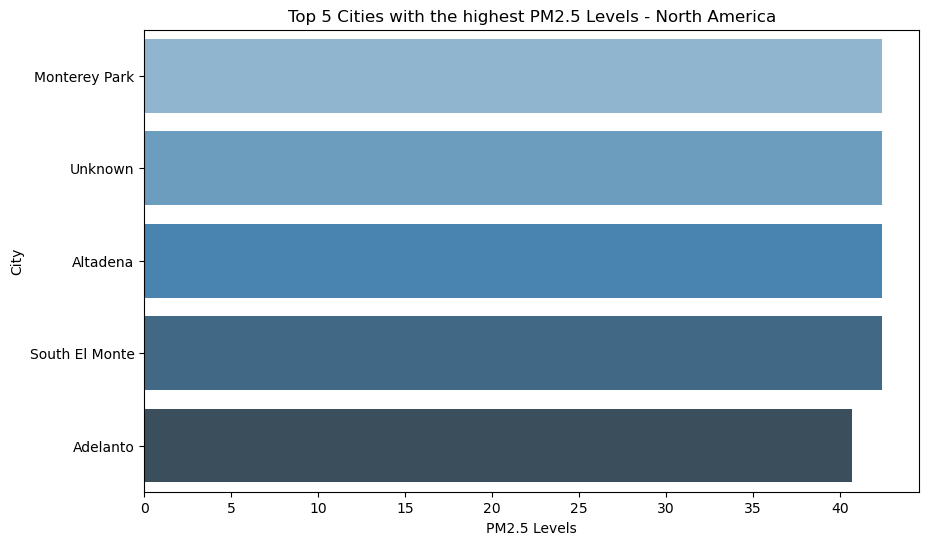

In [59]:
# Sort the data by PM2.5 levels and select the top 5 cities - Highest PM2.5 Level
top_5_pm25 = map_data.sort_values(by="PM2.5", ascending=False).head()
top_5_pm25
# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='PM2.5', y='City', data=top_5_pm25, palette='Blues_d')
plt.title('Top 5 Cities with the highest PM2.5 Levels - North America')
plt.xlabel('PM2.5 Levels')
plt.ylabel('City')
plt.show()

In [61]:
# Sort the data by AQI in descending order to get the highest AQI values first
top_5_cities = map_data.sort_values(by='AQI', ascending=False).head(5)

# Display the top 5 cities with the highest AQI
top_5_cities

,Lat,Lon,AQI,CO,NH3,NO2,O3,PM10,PM2.5,SO2,City
299,34.5828,-117.4092,5,300.41,0.41,5.31,208.86,61.54,40.69,5.48,Adelanto
280,34.0686,-117.9390,4,410.56,1.24,44.55,144.48,40.68,32.81,17.41,West Covina
246,33.8006,-118.3901,3,494.00,0.00,57.58,97.28,47.26,40.39,12.99,Unknown
339,42.8713,-112.4455,3,176.91,0.85,0.74,103.00,26.45,8.37,0.52,Pocatello
338,41.8850,-87.7845,3,1148.22,7.03,93.22,0.00,39.73,27.11,6.80,Oak Park


In [62]:
# Sort the data by AQI in ascending order to get the lowest AQI values first
bottom_5_cities = map_data.sort_values(by='AQI', ascending=True).head(5)

# Display the top 5 cities with the lowest AQI
bottom_5_cities

,Lat,Lon,AQI,CO,NH3,NO2,O3,PM10,PM2.5,SO2,City
0,50.4001,-105.5344,1,230.31,3.67,4.58,49.35,13.73,7.61,1.55,Moose Jaw
215,38.7518,-76.9786,1,367.17,2.22,36.33,31.11,5.35,3.66,4.65,Fort Washington
217,40.3554,-80.0495,1,226.97,0.18,9.43,50.78,1.32,0.86,7.21,Mount Lebanon
219,41.1017,-80.7645,1,236.99,0.36,8.40,55.79,1.89,1.21,2.41,Austintown
220,-33.4166,149.5806,1,223.64,0.14,0.13,42.56,2.71,2.44,0.40,Bathurst


/var/folders/88/s9w214wx7036sclkp3xhfnh40000gn/T/ipykernel_43850/3117837690.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PM2.5', y='City', data=best_5_pm25, palette='Greens_d')


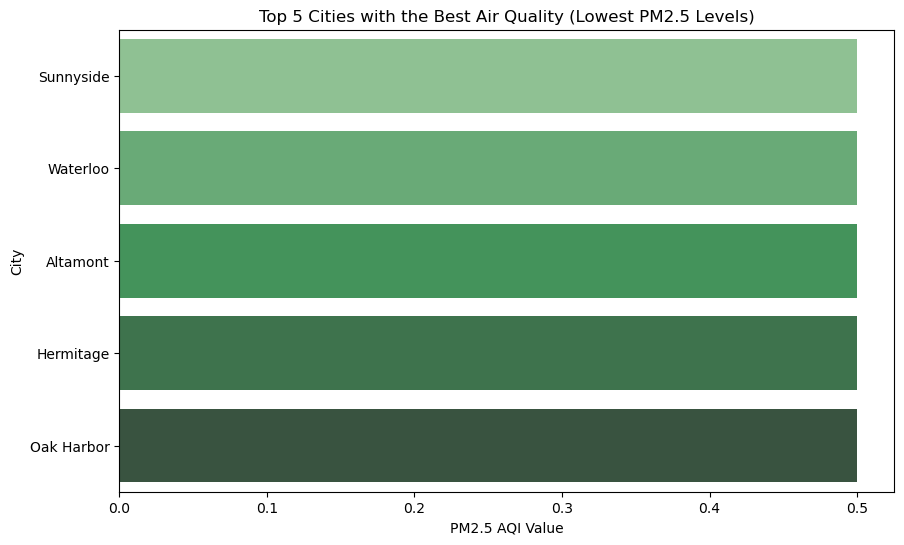

In [64]:
# Sort the data by PM2.5 AQI Value and select the top 5 cities with the lowest levels
best_5_pm25 = map_data.sort_values(by='PM2.5', ascending=True).head(5)

# Plot a horizontal bar chart for best air quality cities
plt.figure(figsize=(10, 6))
sns.barplot(x='PM2.5', y='City', data=best_5_pm25, palette='Greens_d')
plt.title('Top 5 Cities with the Best Air Quality (Lowest PM2.5 Levels)')
plt.xlabel('PM2.5 AQI Value')
plt.ylabel('City')
plt.show()

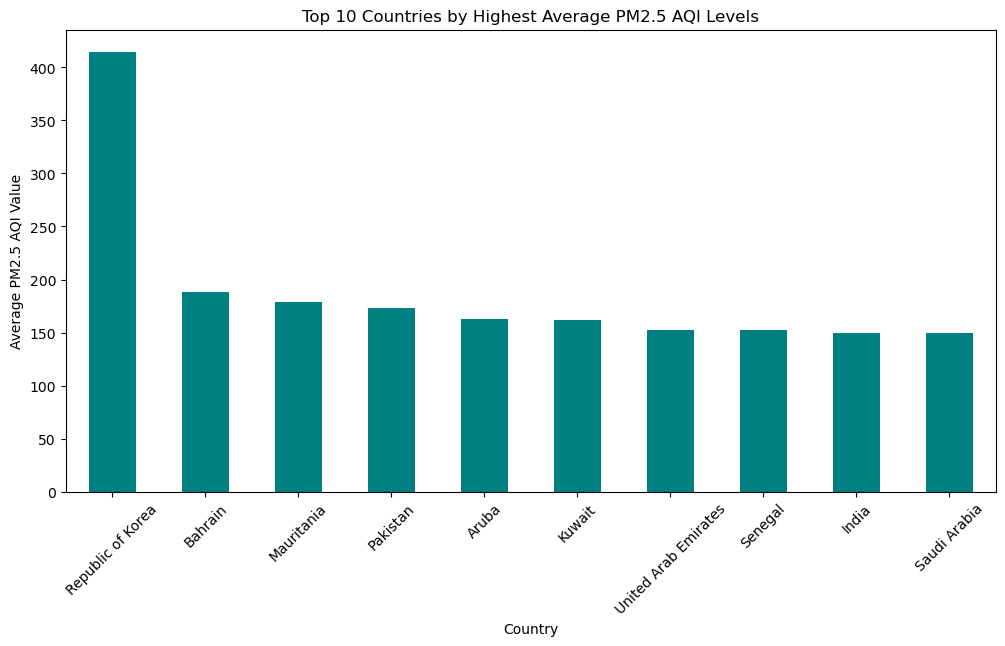

In [65]:
# Group by country and calculate the mean PM2.5 AQI Value
pm25_by_country = global_df.groupby('Country')['PM2.5 AQI Value'].mean().sort_values(ascending=False).head(10)

# Create a bar plot to show the average PM2.5 levels by country
plt.figure(figsize=(12, 6))
pm25_by_country.plot(kind='bar', color='teal')
plt.xlabel('Country')
plt.ylabel('Average PM2.5 AQI Value')
plt.title('Top 10 Countries by Highest Average PM2.5 AQI Levels')
plt.xticks(rotation=45)
plt.show()

In [66]:
# Define a list of available pollution indicators
pollution_indicators = ['AQI', 'CO', 'NH3', 'NO2', 'O3', 'PM10', 'PM2.5', 'SO2']

# Create the initial figure (using AQI by default)
fig = px.bar(map_data, x='City', y='AQI', title="Air Quality Indicators by City")

# Update the layout to include a dropdown
fig.update_layout(
    updatemenus=[
        {
            'buttons': [
                {'method': 'update', 'label': indicator, 'args': [{'y': [map_data[indicator]]}, {'title': f"{indicator} by City"}]} 
                for indicator in pollution_indicators
            ],
            'direction': 'down',
            'showactive': True,
        }
    ]
)

# Show the figure
fig.show()

In [ ]:
# Function to get the AQI, latitude, and longitude from the OpenWeather API for a given city
def get_aqi_data(city, api_key):
    try:
        # Step 1: Get Latitude and Longitude of the city
        geocoding_url = f'http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={api_key}'
        response = requests.get(geocoding_url)
        data = response.json()
        if len(data) > 0:
            lat = data[0]['lat']
            lon = data[0]['lon']
            # Step 2: Use Latitude and Longitude to get AQI value
            aqi_url = f'http://api.openweathermap.org/data/2.5/air_pollution?lat={lat}&lon={lon}&appid={api_key}'
            response = requests.get(aqi_url)
            aqi_data = response.json()
            aqi_value = aqi_data['list'][0]['main']['aqi']
            return city, lat, lon, aqi_value
        else:
            print(f"No data found for city: {city}")
            return city, None, None, None
    except Exception as e:
        print(f"Error fetching data for city: {city}. Error: {str(e)}")
        return city, None, None, None
# Load the cities list
cities_list = pd.read_csv('../Resources/cities_list.csv')['City'].tolist()
# Randomize the list of cities
random_cities = random.sample(cities_list, 500)
# List to store city, latitude, longitude, and AQI data
city_aqi_data = []
# Fetch data for each city in the random_cities list
for city in random_cities:
    city, lat, lon, aqi = get_aqi_data(city, api_key)
    city_aqi_data.append([city, lat, lon, aqi])
# Create a DataFrame from the collected data
aqi_df = pd.DataFrame(city_aqi_data, columns=['City', 'Latitude', 'Longitude', 'AQI'])
# Save the DataFrame to a CSV file
aqi_df.to_csv('../Resources/cities_aqi_data.csv', index=False)
print("Data fetching complete. Saved to cities_aqi_data.csv")

In [81]:
import folium
from folium.plugins import HeatMap


# Create a base map centered around the mean latitude and longitude
mean_lat = map_data['Lat'].mean()
mean_lng = map_data['Lon'].mean()
m = folium.Map(location=[mean_lat, mean_lng], zoom_start=5)

# Prepare the heatmap data (latitude, longitude, AQI)
heat_data = [[row['Lat'], row['Lon'], row['AQI']] for index, row in map_data.iterrows()]
HeatMap(heat_data).add_to(m)

# Define a function to generate HTML for the legend
def add_legend(map_obj):
    legend_html = '''
     <div style="position: fixed;
                 bottom: 50px; right: 50px; width: 150px; height: 150px;
                 background-color: white; z-index:9999; font-size:14px;
                 border:2px solid grey;">
     <h4 style="text-align:center; margin-top: 10px;">AQI Legend</h4>
     <i style="background: green; width: 18px; height: 18px; display: inline-block;"></i> Good <br>
     <i style="background: yellow; width: 18px; height: 18px; display: inline-block;"></i> Fair <br>
     <i style="background: orange; width: 18px; height: 18px; display: inline-block;"></i> Moderate <br>
     <i style="background: red; width: 18px; height: 18px; display: inline-block;"></i> Poor <br>
     <i style="background: purple; width: 18px; height: 18px; display: inline-block;"></i> Very Poor <br>
     </div>
     '''
    map_obj.get_root().html.add_child(folium.Element(legend_html))

# Call the function to add the legend
add_legend(m)

# Save the heatmap with the legend to an HTML file
output_path = 'aqi_heatmap_with_legend.html'
m.save(output_path)

print(f"Heatmap saved to {output_path}")

Heatmap saved to aqi_heatmap_with_legend.html


/var/folders/88/s9w214wx7036sclkp3xhfnh40000gn/T/ipykernel_43850/2494831794.py:80: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/88/s9w214wx7036sclkp3xhfnh40000gn/T/ipykernel_43850/2494831794.py:80: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/88/s9w214wx7036sclkp3xhfnh40000gn/T/ipykernel_43850/2494831794.py:80: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [80]:
import panel as pn
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook
import numpy as np
import time

output_notebook()

# Enable Panel inline plotting in notebooks
pn.extension()

# Cities to analyze along with their latitude and longitude
cities_info = {
    'New York': {'lat': 40.7143, 'lon': -74.006},
    'Los Angeles': {'lat': 34.0522, 'lon': -118.2437},
    'Chicago': {'lat': 41.85, 'lon': -87.65},
    'Houston': {'lat': 29.7633, 'lon': -95.3633},
    'Phoenix': {'lat': 33.4484, 'lon': -112.074}
}


# Function to fetch air quality data from OpenWeather API
def fetch_air_quality_data(city, lat, lon, start_date, end_date):
    start_timestamp = int(datetime.strptime(start_date, '%Y-%m-%d').timestamp())
    end_timestamp = int(datetime.strptime(end_date, '%Y-%m-%d').timestamp())
    url = f"http://api.openweathermap.org/data/2.5/air_pollution/history"
    
    # OpenWeather API allows fetching data in hourly intervals
    params = {
        'lat': lat,
        'lon': lon,
        'start': start_timestamp,
        'end': end_timestamp,
        'appid': api_key
    }
    
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json().get('list', [])
        return data
    else:
        print(f"Failed to fetch data for {city}: {response.status_code}")
        return []

# Function to get air quality data for all cities and aggregate it into a DataFrame
def get_air_quality_data(cities_info, start_date, end_date):
    all_data = []
    for city, coords in cities_info.items():
        lat, lon = coords['lat'], coords['lon']
        city_data = fetch_air_quality_data(city, lat, lon, start_date, end_date)
        for entry in city_data:
            dt = datetime.utcfromtimestamp(entry['dt'])
            components = entry['components']
            all_data.append({
                'City': city,
                'Date': dt,
                'AQI': entry.get('main', {}).get('aqi', np.nan),  # You may need to calculate this from components
                'CO': components.get('co', np.nan),
                'NO2': components.get('no2', np.nan),
                'PM10': components.get('pm10', np.nan),
                'PM2.5': components.get('pm2_5', np.nan),
                'SO2': components.get('so2', np.nan)
            })
        time.sleep(1)  # To avoid exceeding the API rate limit
    return pd.DataFrame(all_data)

# Generate data for the given date range
start_date = '2019-01-01'
end_date = '2023-12-31'
air_quality_data = get_air_quality_data(cities_info, start_date, end_date)

# Function to create a Bokeh plot for multiple cities
def create_bokeh_plot(data, selected_cities):
    # Filter data for the selected cities
    city_data = data[data['City'].isin(selected_cities)]

    # Convert date column to datetime
    city_data['Date'] = pd.to_datetime(city_data['Date'])

    # Create a new plot
    p = figure(
        title=f"Air Quality Over 5 Years for Selected Cities",
        x_axis_label='Date',
        y_axis_label='Concentration (μg/m3)',
        x_axis_type='datetime',
        width=900,
        height=500
    )

    # Add lines for different pollutants for each selected city
    colors = ['blue', 'red', 'purple', 'orange', 'brown', 'gray']
    pollutants = ['CO', 'NO2', 'PM10', 'PM2.5', 'SO2']

    for i, city in enumerate(selected_cities):
        city_specific_data = city_data[city_data['City'] == city]
        source = ColumnDataSource(city_specific_data)
        
        for j, pollutant in enumerate(pollutants):
            p.line(
                x='Date', 
                y=pollutant, 
                line_width=2, 
                source=source, 
                color=colors[j % len(colors)], 
                legend_label=f"{pollutant} ({city})"
            )

    # Customize legend
    p.legend.location = "top_left"
    p.legend.click_policy = "hide"

    return p

# Panel widget for multiple city selection
city_selector = pn.widgets.MultiSelect(name='Cities', options=list(cities_info.keys()), size=5)

# Function to update the plot based on city selection
@pn.depends(city_selector.param.value)
def update_plot(selected_cities):
    if selected_cities:
        return create_bokeh_plot(air_quality_data, selected_cities)
    else:
        return "Please select at least one city."

# Create the dashboard layout
dashboard2 = pn.Column(city_selector, update_plot)

# Display the dashboard
dashboard2.show()

Loading BokehJS ...

/var/folders/88/s9w214wx7036sclkp3xhfnh40000gn/T/ipykernel_43850/2494831794.py:11: UserWarning:

Using Panel interactively in VSCode notebooks requires the jupyter_bokeh package to be installed. You can install it with:

   pip install jupyter_bokeh

or:
    conda install jupyter_bokeh

and try again.



/var/folders/88/s9w214wx7036sclkp3xhfnh40000gn/T/ipykernel_43850/2494831794.py:53: DeprecationWarning:

datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).



Launching server at http://localhost:50798
